In [59]:
import requests as r
from io import BytesIO, StringIO
import zipfile
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# How To Run:
1) Go to http://www.caiso.com/Documents/OASIS-InterfaceSpecification_v5_1_4Clean_Fall2018Release.pdf

    
    1a) Determine what you want to query (information provided in Section 5)


2) Go to Section 6, navigate to the row for your desired information


3) Build the 'payload' dictionary to match the neccessary parameters for the URL in Section 6

    3a) The XML Name is  the 'queryname' parameter
    3b) The startdatetime and enddatetime are this format:  YYYYMMDDTHrHr:MinMin-0000, ie: 20201019T13-30-0000 is October
        19th, 2020 at 1:30pm 
    3c) The other parameters must be determined using the document

4) Run get_data, an XML file will be returned

    4a) Unfortunately, it's not trivial to convert all of these XMLs to a Pandas/Numpy structure since they can be different formats thus...
    
5) Convert XML to numpy/pandas (different depending on what your application is). Example provided

In [2]:
base_url = r'http://oasis.caiso.com/oasisapi/SingleZip?'
# ?queryname=PRC_AS&startdatetime=20191018T07:00-0000&enddatetime=20191019T07:00-0000
# &market_run_id=DAM&version=1&as_type=ALL&as_region=ALL

def get_data(params):
    # building URL
    url = base_url
    for key, value in params.items():
        url += f"{key}={value}&"
    data = r.get(url[:-1]).content
    print("URL:" url)
    try:
        filecontent = BytesIO(data)
    except TypeError:
        filecontent = StringIO(data)

    try:
            # have zipfile
        z = zipfile.ZipFile(filecontent)
    except zipfile.BadZipfile:
        return None

        # have unzipped content
    unzipped = [z.read(thisfile) for thisfile in z.namelist()]
    z.close()

        # return
    return unzipped

In [3]:

payload = {
    'queryname': 'PRC_LMP', 
    'startdatetime': '20190919T07:00-0000',
    'enddatetime': '20100920T07:00-0000',
    'version': '1',
    'market_run_id': 'DAM',
    'grp_type': 'ALL_APNODES'
}
payload = {
    'queryname': 'PRC_LMP', 
    'startdatetime': '20190919T07:00-0000',
    'enddatetime': '20190920T07:00-0000',
    'version': '1',
    'market_run_id': 'DAM',
    'node': 'LAPLMG1_7_B2'
}

In [6]:
xml = get_data(payload)


http://oasis.caiso.com/oasisapi/SingleZip?queryname=PRC_LMP&startdatetime=20190919T07:00-0000&enddatetime=20190920T07:00-0000&version=1&market_run_id=DAM&node=LAPLMG1_7_B2&


In [24]:
root = ET.fromstring(str(xml[0])[2:-3])

Hour 8 has value 33.79795
Hour 9 has value 26.17796
Hour 15 has value 19.38633
Hour 10 has value 14.77281
Hour 17 has value 24.35226
Hour 18 has value 34.50551
Hour 2 has value 28.33387
Hour 19 has value 45.32648
Hour 3 has value 28.86852
Hour 4 has value 28.03001
Hour 7 has value 38.63197
Hour 14 has value 14.08136
Hour 5 has value 29.02388
Hour 6 has value 35.21413
Hour 11 has value 6.81206
Hour 12 has value 9.98983
Hour 16 has value 22.29745
Hour 13 has value 7.6052
Hour 1 has value 29.62703
Hour 23 has value 30.04989
Hour 20 has value 47.59492
Hour 21 has value 40.77988
Hour 22 has value 35.62486
Hour 24 has value 28.13849


<BarContainer object of 24 artists>

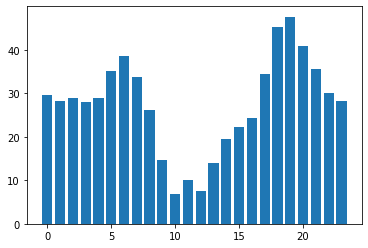

In [62]:
arr = [None] * 24
for item in root[1][0][1][1:]:
    print(f'Hour {item[3].text} has value {item[6].text}')
    arr[int(item[3].text)-1] = float(item[6].text)
plt.bar(range(0,24), arr)

In [50]:
d = root[1][0][1][1][3]

'8'